In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [3]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Visualize/Explore Data - If You Want, You Do You

In [4]:
df["income"] =np.exp(df["log.annual.inc"])
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9.578000e+03
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.160054,6.840203e+04
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.366676,6.122753e+04
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,1.896000e+03
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,3.850000e+04
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,5.576400e+04
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,8.012100e+04
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,1.000000,2.039784e+06


14.812743547869088 2.113550048323677e-49


<AxesSubplot:xlabel='fico', ylabel='Count'>

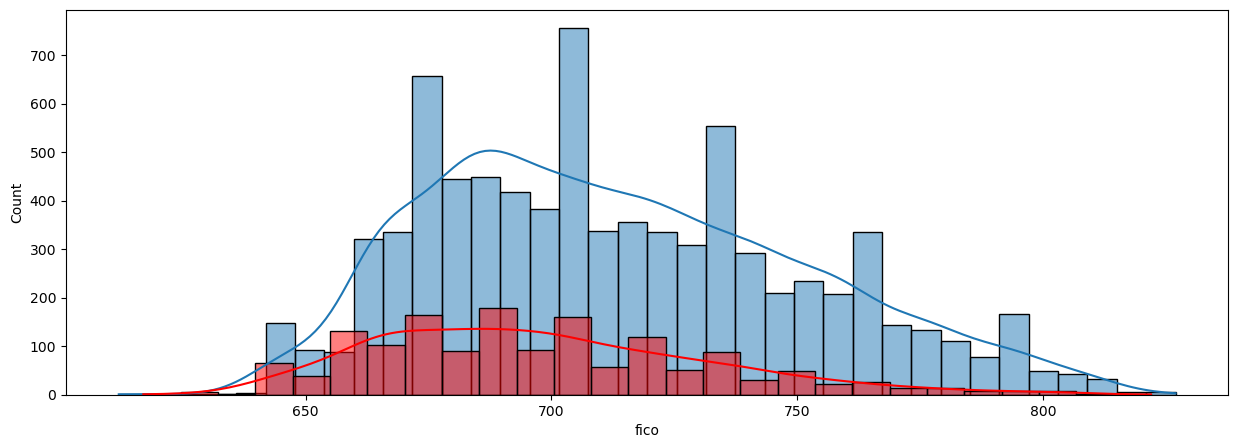

In [7]:
dfP= df[df["not.fully.paid"]==0]
dfF=df[df["not.fully.paid"]==1]

paid=dfP.fico
fail=dfF.fico
stat, pval = ss.ttest_ind(paid, fail, alternative="greater")
print(stat,pval)
sns.histplot(paid, kde=True )
sns.histplot(fail, kde=True, color='red')


#3

36.36259987408664 1.3050208415375698e-271


<AxesSubplot:xlabel='fico', ylabel='Count'>

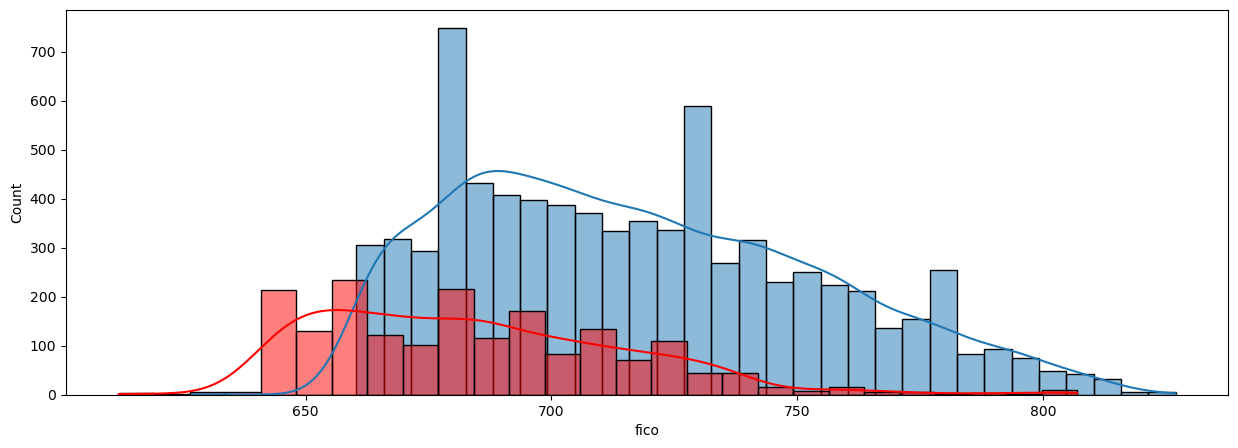

In [8]:
dfw= df[df["credit.policy"]==1]
dfn=df[df["credit.policy"]==0]

wor=dfw.fico
notwor=dfn.fico
statw, pvalw = ss.ttest_ind(wor, notwor, alternative="greater")
print(statw,pvalw)
sns.histplot(wor, kde=True )
sns.histplot(notwor, kde=True, color='red')

In [9]:
dfw= df[df["credit.policy"]==1]
dfn=df[df["credit.policy"]==0]

wori=dfw["log.annual.inc"]	
notwori=dfn["log.annual.inc"]	
statwi, pvalwi = ss.ttest_ind(wori, notwori)
statwi,pvalwi

(3.4178817682392073, 0.0006337324172012597)

In [47]:
wMean, nwMean, wCount, nwCount = wori.mean(), notwori.mean(), wori.count(), notwori.count()
wMean, nwMean, wCount, nwCount

(10.942680001295294, 10.888519880012797, 7710, 1868)

In [48]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(wori, notwori)
alpha = .05
nobs = wCount + nwCount

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces


(1.0, 0.08813984185782714)

In [49]:
np = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
np

1157.6455504969408

## Solutions

In [10]:
df["income"].mean()

68402.03071015503

0.6210290601166143


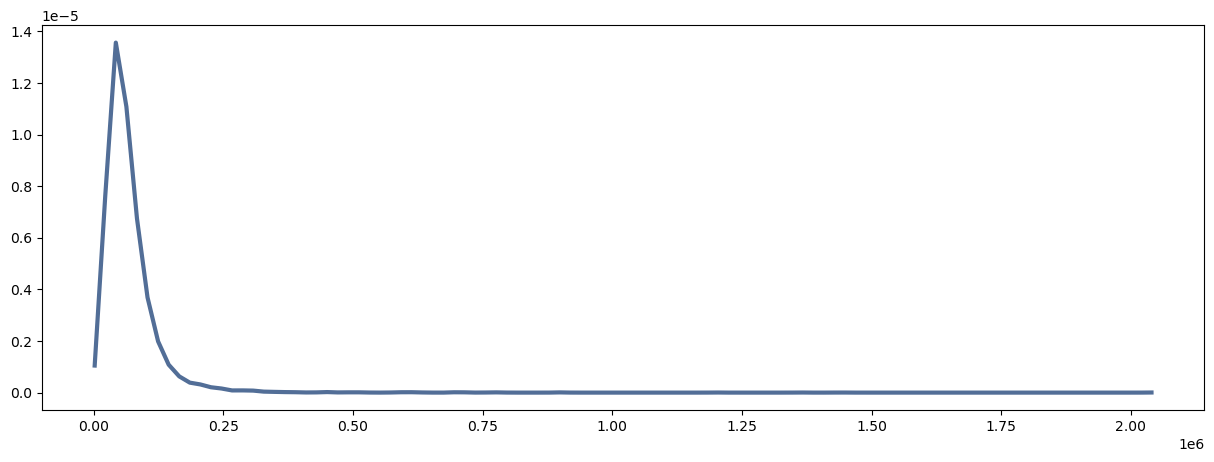

In [11]:
#10

skw1 = thinkstats2.PearsonMedianSkewness(df["income"])
print(skw1)
pdf1=thinkstats2.EstimatedPdf(df["income"])
thinkplot.Pdf(pdf1)

0.30390788935426843


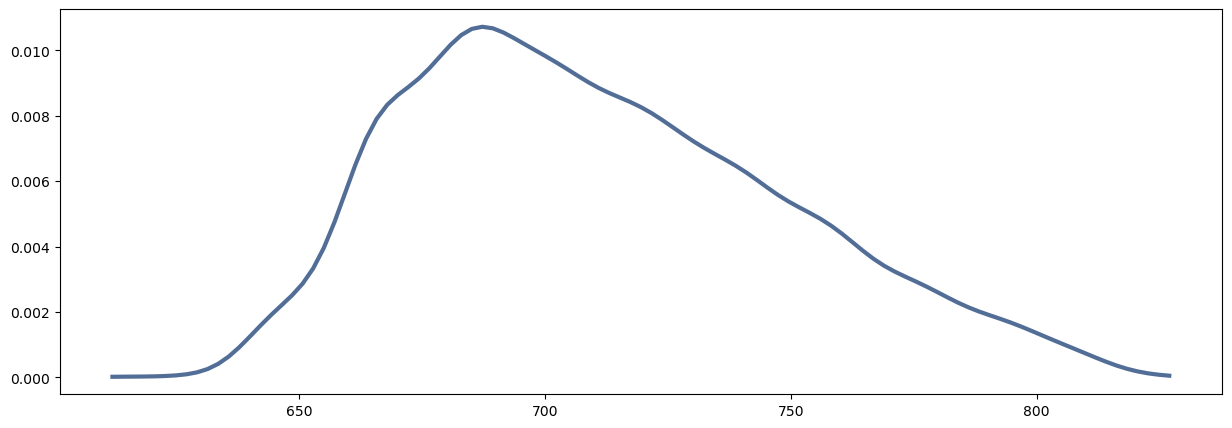

In [12]:
skw2 = thinkstats2.PearsonMedianSkewness(df["fico"])
print(skw2)
pdf2=thinkstats2.EstimatedPdf(df["fico"])
thinkplot.Pdf(pdf2)

0.5056178217400077


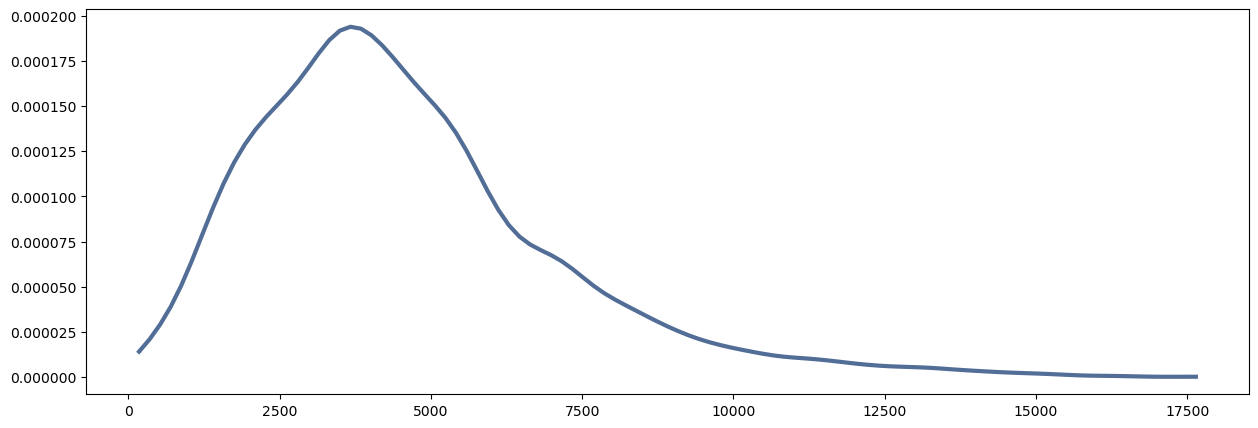

In [13]:
skw3 = thinkstats2.PearsonMedianSkewness(df["days.with.cr.line"])
print(skw3)
pdf3=thinkstats2.EstimatedPdf(df["days.with.cr.line"])
thinkplot.Pdf(pdf3)


#15

In [14]:
print("Income-score:", thinkstats2.Corr(df["income"], df["fico"]), thinkstats2.SpearmanCorr(df["income"], df["fico"]))
print("Interest-score:", thinkstats2.Corr(df["int.rate"], df["fico"]), thinkstats2.SpearmanCorr(df["int.rate"], df["fico"]))
print("util-score:", thinkstats2.Corr(df["revol.util"], df["fico"]), thinkstats2.SpearmanCorr(df["revol.util"], df["fico"]))

Income-score: 0.08619377296447177 0.10787785096258333
Interest-score: -0.7148207714193593 -0.7449861174898882
util-score: -0.54128933500756 -0.5200854949579616


<AxesSubplot:xlabel='fico', ylabel='log.annual.inc'>

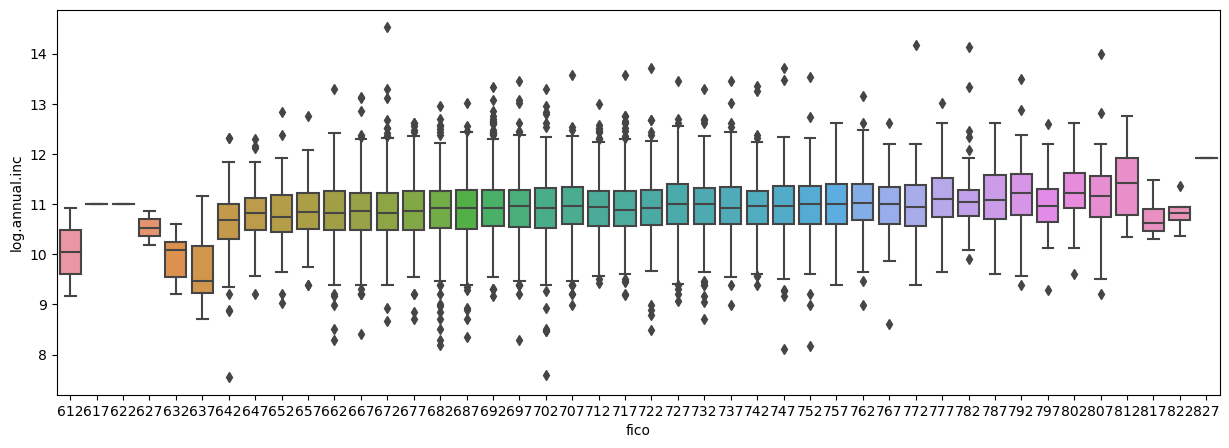

In [66]:
#12

sns.boxplot(data=df, x="fico", y="log.annual.inc")

In [15]:
def mapping(x):
    if(x>=300 and x<=579):
        y=1
    elif(x>=580 and x<=669):
        y=2
    elif(x>=670 and x<=739):
        y=3
    elif(x>=740 and x<=799):
        y=4
    else:
        y=5
    return y

In [16]:
df["fico_mapped"]=df["fico"].apply(mapping)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income,fico_mapped
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,85000.000385,3
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,65000.000073,3
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,31999.999943,3
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,85000.000385,3
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,80799.999636,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,1,195000.000479,3
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,1,68999.999753,3
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,1,39999.999876,3
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,1,49999.999779,3


In [17]:
var=ss.levene(df['income'][df["fico_mapped"]==2],
               df['income'][df["fico_mapped"]==3] ,
               df['income'][df["fico_mapped"]==4] ,
               df['income'][df["fico_mapped"]==5])
var

LeveneResult(statistic=10.46667305452041, pvalue=7.172631377031566e-07)

In [18]:
ss.f_oneway(
              df['income'][df["fico_mapped"]==2],
               df['income'][df["fico_mapped"]==3] ,
               df['income'][df["fico_mapped"]==4] ,
               df['income'][df["fico_mapped"]==5])


F_onewayResult(statistic=24.589840884616407, pvalue=7.630749644284833e-16)

c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='log.annual.inc', ylabel='Density'>

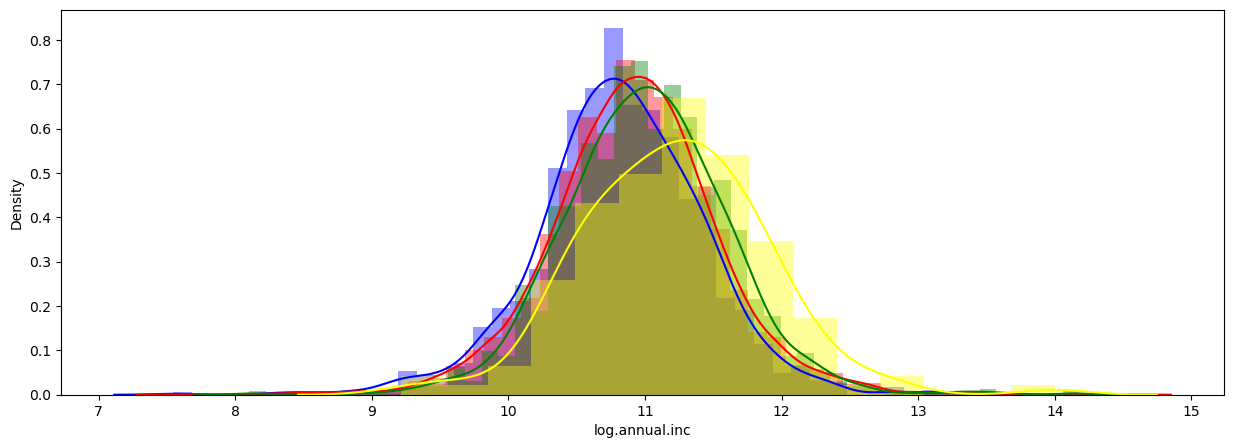

In [29]:
sns.distplot(df['log.annual.inc'][df["fico_mapped"]==2],color="blue")
sns.distplot(df['log.annual.inc'][df["fico_mapped"]==3],color="red")
sns.distplot(df['log.annual.inc'][df["fico_mapped"]==4],color="green")
sns.distplot(df['log.annual.inc'][df["fico_mapped"]==5],color="yellow")